 # STACKED BAR CHARTS & MARIMEKKO CHARTS
 
 Marimekko:
 Commonly referred to as Mosaic plots; spine plots or just Mekko.  

In essence, they are just stacked bar charts where the bar **widths** are used to display another variable - usually the group's proportion to the total.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmp
import matplotlib.colors as cl
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxl', grid=False)
warnings.filterwarnings('ignore')

In [2]:
olympics = pd.read_csv('./Olympics-Dataset.csv')

Using the Olympic games dataset, and data on the Marathon event as it was the closest sounding thing to Marimekko.


In [3]:
# selected countries to focus on
focus = ['Ethiopia', 'Kenya', 'United States', 'Japan', 'Great Britain', 'South Korea', 'Portugal']

In [4]:
# selected events, queried
marathon_men = olympics.query('''Event == "Athletics Men's Marathon" and Year > 1930''')

In [5]:
marathon_men_focus = marathon_men['Team'].value_counts()[focus]

In [6]:
marathon_men_focus

Ethiopia         37
Kenya            34
United States    55
Japan            53
Great Britain    56
South Korea      44
Portugal         27
Name: Team, dtype: int64

In [21]:
marathon_men_focus_df = marathon_men[['Team', 'Medal']]

In [7]:
# medals vs no medals in the event
marathon_men_medals = marathon_men.query('~Medal.isnull()')
marathon_men_no_medals = marathon_men.query('Medal.isnull()')

In [8]:
marathon_men_focus_medals = marathon_men_medals['Team'].value_counts()[focus]
marathon_men_focus_no_medals = marathon_men_no_medals['Team'].value_counts()[focus]

In [9]:
marathon_men_focus_no_medals

Ethiopia         29
Kenya            27
United States    51
Japan            48
Great Britain    51
South Korea      42
Portugal         26
Name: Team, dtype: int64

In [10]:
marathon_men_focus_medals

Ethiopia         8
Kenya            7
United States    4
Japan            5
Great Britain    5
South Korea      2
Portugal         1
Name: Team, dtype: int64

In [11]:
# y values for athletes with medals
y_b = []
for man in marathon_men_focus_medals:
    y_b.append(man)

In [13]:
y_b

[8, 7, 4, 5, 5, 2, 1]

In [12]:
# y values for athletes without medals
y_n = []
for man in marathon_men_focus_no_medals:
    y_n.append(man)

In [15]:
y_n

[29, 27, 51, 48, 51, 42, 26]

In [13]:
# x axis tick labels
x_ticks = []
for men in marathon_men_focus.index:
    x_ticks.append(men)

In [17]:
x_ticks

['Ethiopia',
 'Kenya',
 'United States',
 'Japan',
 'Great Britain',
 'South Korea',
 'Portugal']

In [14]:
marathon_women = olympics.query('''Event == "Athletics Women's Marathon" and Year > 1930''')

In [15]:
marathon_women_focus = marathon_women[['Team', 'Medal']]

In [16]:
marathon_women_mosaic = marathon_women_focus .query('''Team == "Ethiopia" or Team == "Kenya" or Team == "United States" or Team == "Japan" or Team == "Great Britain" or Team == "South Korea" or Team == "Portugal" ''')

In [17]:
marathon_women_mosaic = marathon_women_mosaic.loc[~marathon_women_mosaic.Medal.isnull()]

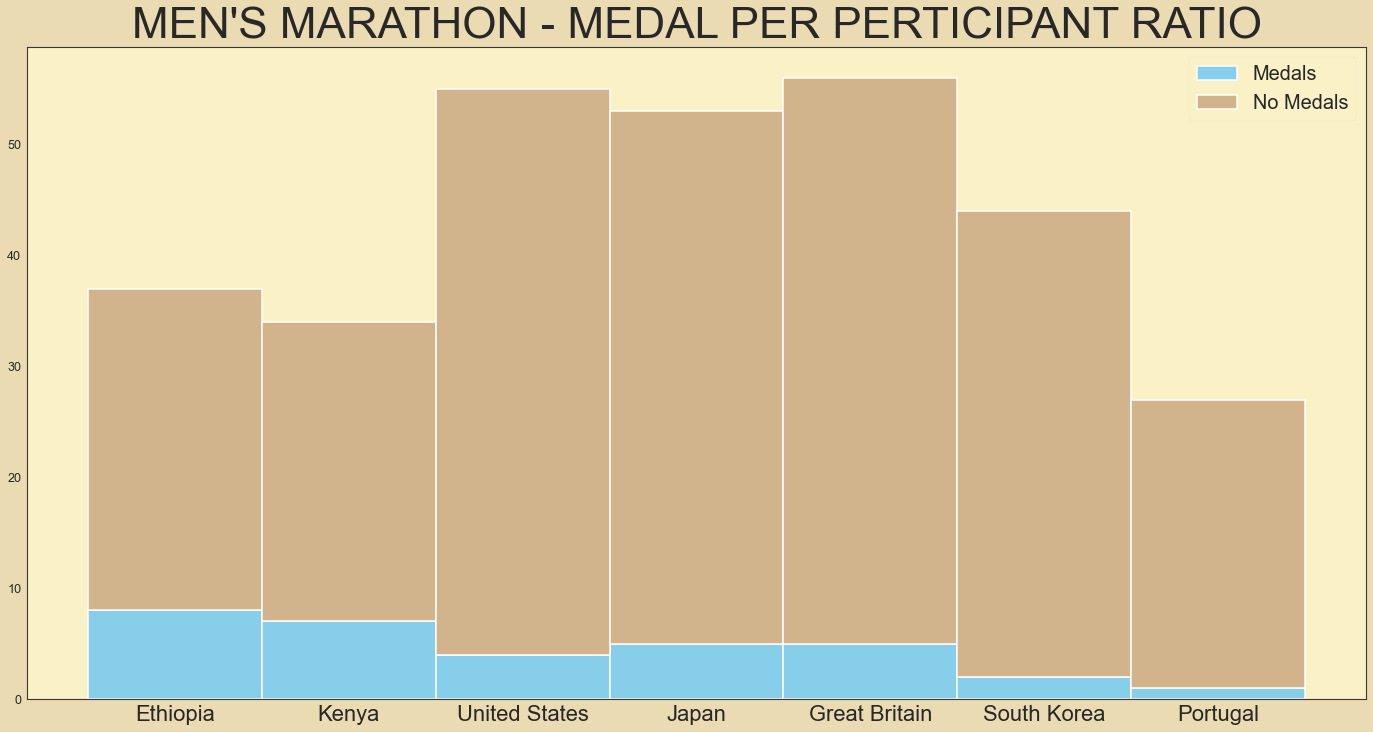

In [49]:
bar_width = 1
bar_l = np.arange(0, len(x_ticks))
tick_pos = [i + (bar_width / 2) for i in bar_l]

fig, ax = plt.subplots(1, figsize=(24,12))

plt.bar(x_ticks,
        y_b,
        width=1,
        align='edge',
        edgecolor='w',
        linewidth=1.5,
        color='skyblue',
        label='Medals'
        )

plt.bar(x_ticks,
       y_n,
       bottom = y_b,
       width = 1,
        align='edge',
        edgecolor='w',
        linewidth=1.5,
        color='tan',
        label='No Medals'
       )

plt.xticks(tick_pos, x_ticks, fontsize=22)
plt.legend(prop={'size': 20})
plt.title("MEN'S MARATHON - MEDAL PER PERTICIPANT RATIO", fontsize=44)
plt.show()

Staked bars in plotly: 


In [23]:
marathon_men_focus_df = marathon_men_focus_df.query('''Team == "Ethiopia" or Team == "Kenya" or Team == "United States" or Team == "Japan" or Team == "Great Britain" or Team == "South Korea" or Team == "Portugal" ''')
marathon_men_focus_df = marathon_men_focus_df.loc[~marathon_men_focus_df.Medal.isnull()]

In [45]:
fig = px.bar(marathon_men_focus_df, x='Team',
             hover_data=['Team', 'Medal'], color='Medal',
             labels={'count':'Medal count'}, title='MARATHON MEDALS -\nMALE ATHLETES', text="Medal", color_discrete_map={
        'Gold': 'yellow',
        'Silver': 'silver',
        'Bronze': 'orange'
    },  template = "plotly_white",)
fig.update_layout()
fig.show()

Marimekko:
Different visual. Here we'll only look at the medalists and see the different medals from the selected countries.
Oh, women medalists, to be specific. Analysis is done on female athletes.


In [19]:
from statsmodels.graphics.mosaicplot import mosaic

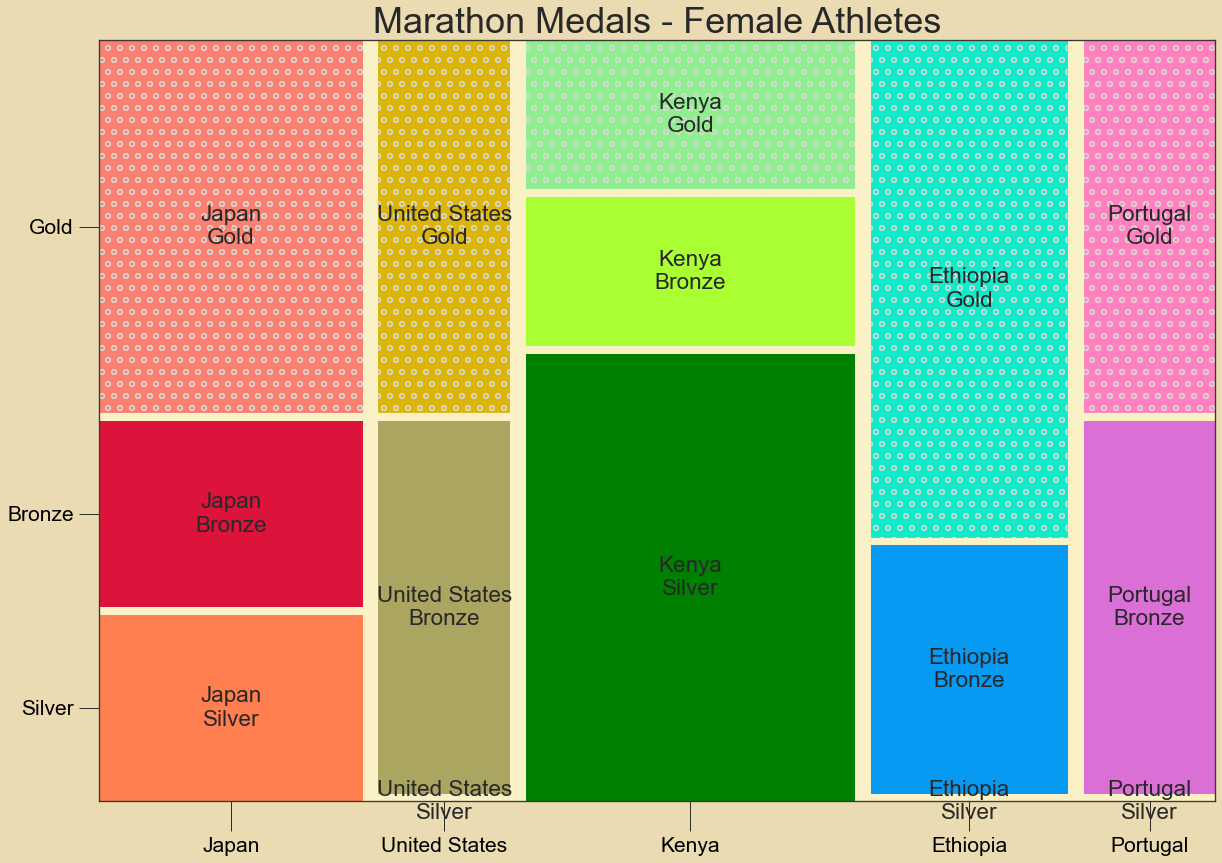

In [50]:
fig, ax = plt.subplots(figsize=(20, 14))
props = {}
props[('United States', 'Gold')] = {'facecolor': 'xkcd:gold',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Japan', 'Gold')] = {'facecolor': 'salmon',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Kenya', 'Gold')] = {'facecolor': 'lightgreen',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Ethiopia', 'Gold')] = {'facecolor': 'xkcd:aqua',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Portugal', 'Gold')] = {'facecolor': 'xkcd:pink',
                       'edgecolor':'xkcd:light grey',
                       'hatch':'o'}
props[('Japan', 'Silver')] = {'facecolor': 'coral',
                       }
props[('Kenya', 'Silver')] = {'facecolor': 'green',
                      }
props[('Ethiopia', 'Silver')] = {'facecolor': 'black',
                       }
props[('United States', 'Bronze')] = {'facecolor': 'xkcd:khaki',
                                      
                       }
props[('Japan', 'Bronze')] = {'facecolor': 'crimson',
                       }
props[('Kenya', 'Bronze')] = {'facecolor': 'xkcd:lime',
                      }
props[('Ethiopia', 'Bronze')] = {'facecolor': 'xkcd:azure',
                       }
props[('Portugal', 'Bronze')] = {'facecolor': 'orchid',
                       }
ax.tick_params(axis='x', colors="black", size=30, labelsize=21)
ax.tick_params(axis='y', colors="black", size=20, labelsize=21)
plt.rcParams.update({'font.size': 27})
mosaic(marathon_women_mosaic, ["Team", "Medal"], gap=0.015, ax=ax, properties=props)
plt.title("Marathon Medals - Female Athletes", fontsize = 36)
plt.show()

The bar widths here represent the volume/number of medals won by each specific Nation/Team; something that regular stacked bars cannot visualize.